<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Pendelgleichung" data-toc-modified-id="Pendelgleichung-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Pendelgleichung</a></span><ul class="toc-item"><li><span><a href="#Phasenraum-und-Trajektorien" data-toc-modified-id="Phasenraum-und-Trajektorien-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Phasenraum und Trajektorien</a></span></li></ul></li><li><span><a href="#Bessel-Differentialgleichung" data-toc-modified-id="Bessel-Differentialgleichung-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Bessel Differentialgleichung</a></span></li><li><span><a href="#Bernoulli-DGL" data-toc-modified-id="Bernoulli-DGL-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Bernoulli DGL</a></span></li></ul></div>

In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
init_printing()
%matplotlib notebook
x,t,n = symbols('x t n')
y = Function('y')
u = Function('u')

# Lektion 13
## Pendelgleichung

$$ \ddot{y}(t) = - \sin(y(t)) $$
aequivalent dazu 
\begin{align}
\dot{y}_1(t) = y_2(t) \\
\dot{y}_2(t) = -\sin(y_1(t))
\end{align}


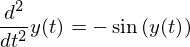

In [2]:
dgl = Eq(y(t).diff(t,2),-sin(y(t)))
dgl

In [3]:
##dsolve(dgl)

### Phasenraum und Trajektorien

In [4]:
def f(y,t):
    y1 = y[0]
    y2 = y[1]
    return y2,-np.sin(y1)

In [5]:
y1 = np.linspace(-3.0,3.0,15)
y2 = np.linspace(-2.0,2.0,10)
Y1,Y2 = np.meshgrid(y1,y2)
ts=0

In [6]:
U,V = np.zeros_like(Y1) , np.zeros_like(Y1)

In [7]:
U,V = f([Y1,Y2],ts)

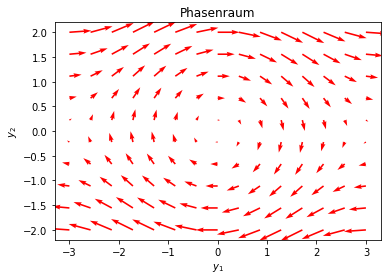

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Phasenraum')
ax.quiver(Y1,Y2,U,V,angles='xy',color='r')
ax.set_aspect('equal');
ax.set_xlabel('$y_1$');
ax.set_ylabel('$y_2$');

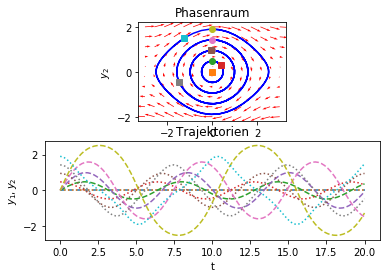

In [9]:
from scipy.integrate import odeint

fig = plt.figure()

ax1 = fig.add_subplot(211)
ax1.quiver(Y1,Y2,U,V,angles='xy',color='r')
ax1.set_aspect('equal');
ax1.set_xlabel('$y_1$');
ax1.set_ylabel('$y_2$');
ax1.set_title('Phasenraum')

ax2 = fig.add_subplot(212)
ax2.set_title('Trajektorien')

tvec = np.linspace(0,20,100)
for y20 in np.linspace(0,1.9,5):
    y0 = [0.0,y20]
    ys = odeint(f,y0,tvec)
    ax1.plot(ys[:,0],ys[:,1],'b-') # Loesung im Phasenraum
    ax1.plot(ys[0,0],ys[0,1],'o')  # Startwert
    ax1.plot(ys[-1,0],ys[-1,1],'s') # Wert zum Endzeitpunkt

    ax2.plot(tvec,ys[:,0],'--')
    ax2.plot(tvec,ys[:,1],':')
    ax2.set_xlabel('t')
    ax2.set_ylabel('$y_1, y_2$')

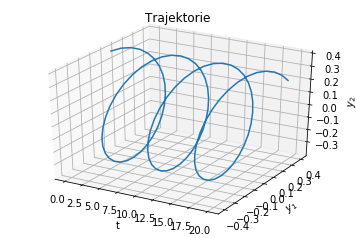

In [10]:
from mpl_toolkits.mplot3d import Axes3D

y0 = [0.0,0.4]
ys = odeint(f,y0,tvec)

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot3D(tvec,ys[:,0],ys[:,1])
ax.set_xlabel('t')
ax.set_ylabel('$y_1$')
ax.set_zlabel('$y_2$')
ax.set_title('Trajektorie')
plt.show()

In [11]:
ax.view_init(0, 0)
plt.show()

In [12]:
ax.view_init(0, 90)
plt.show()

In [13]:
ax.view_init(90,-90)
plt.show()

falls der Winkel klein ist, ist 
$$
\sin(y) \approx y
$$
und wir erhalten als Approximation 
\begin{align}
\dot{u}_1(t) = u_2(t) \\
\dot{u}_2(t) = -u_1(t))
\end{align}

In [14]:
dgl = Eq(u(t).diff(t,2),-u(t))
sol = dsolve(dgl)
yu = sol.rhs.subs(solve([(sol.rhs).subs(t,0)-y0[0],(sol.rhs.diff(t)).subs(t,0)-y0[1]]))
yu

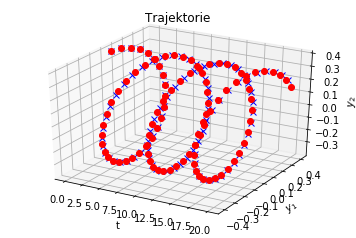

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot3D(tvec,ys[:,0],ys[:,1],'bx')
ax.plot3D(tvec,lambdify(t,yu)(tvec),lambdify(t,yu.diff(t))(tvec),'ro')
ax.set_xlabel('t')
ax.set_ylabel('$y_1$')
ax.set_zlabel('$y_2$')
ax.set_title('Trajektorie')
plt.show()

## Bessel Differentialgleichung

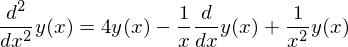

In [16]:
dgl = Eq(y(x).diff(x,2), -1/x * y(x).diff(x)+ 1/x**2*y(x) + 4*y(x))
dgl

In [17]:
##dsolve(dgl) # funktioniert nicht

In [18]:
a = symbols('a:18')
N = len(a)

In [19]:
ys = sum([a[j]*x**j for j in range(N)])
ys

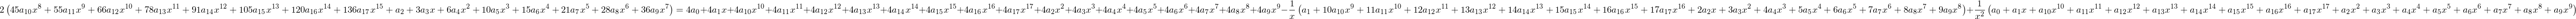

In [20]:
gl = dgl.subs(y(x),ys).doit()
gl

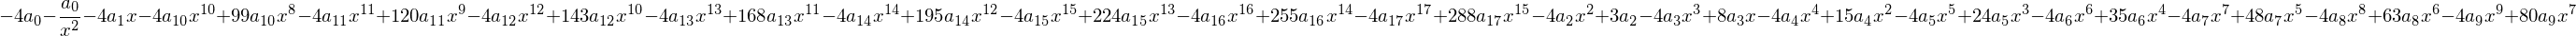

In [21]:
gl1 = (gl.lhs - gl.rhs).expand()
gl1

In [22]:
#gl1.as_poly(t).all_coeffs()
# klappt nicht

In [23]:
gl1.coeff(x**(-2))

In [24]:
gl1.coeff(x**(-1))

In [25]:
gl1.coeff(x,-1)

In [26]:
gl1.coeff(x,1) # Konstanter Term

In [27]:
gls = []
for j in range(N+1):
    glg = Eq(gl1.coeff(x,j-2),0)
    if glg != True:
        gls.append(glg)
gls

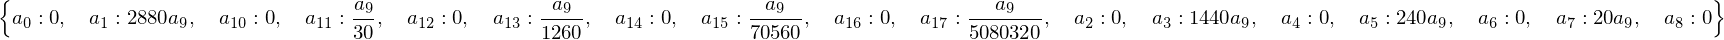

In [28]:
solve(gls[:-1])

In [29]:
var = list(a).copy()
del var[1]
var

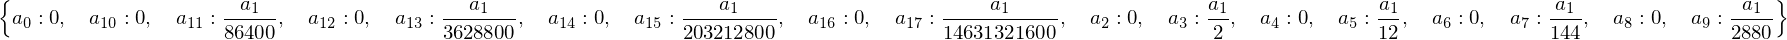

In [30]:
Lsg = solve(gls[:-1],var)
Lsg

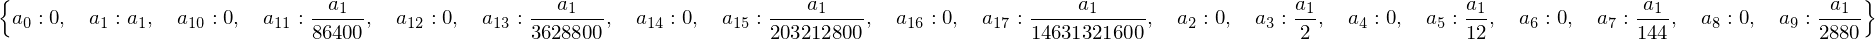

In [31]:
Lsg[a[1]] = a[1]
Lsg

In [32]:
q = [Lsg[a[2*j+1]]/Lsg[a[2*j+3]] for j in range(int(N/2)-2)]
q

In [33]:
q = [Lsg[a[2*j+1]]/Lsg[a[2*j+3]]/(j+2) for j in range(int(N/2)-2)]
q

Also ist 
$$
\frac{a_{2j+1}}{a_{2j+3}} = (j+1)(j+2)
$$
Test

In [34]:
q = [Lsg[a[2*j+1]]/Lsg[a[2*j+3]] - (j+1)*(j+2) for j in range(int(N/2)-2)]
q

und damit
$$
a_{2n+1} = \prod_{j=0}^{n-1} \frac{1}{(j+1)(j+2)} a_1 = \frac{a_1}{(n)!(n+1)!}
$$

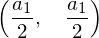

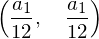

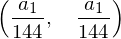

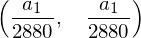

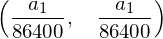

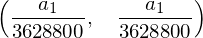

In [35]:
for j in range(int(N/2)-2):
    display((Lsg[a[2*j+1]], a[1]/factorial(j)/factorial(j+1)))

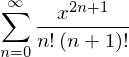

In [36]:
yR = Sum(x**(2*n+1)/factorial(n)/factorial(n+1),(n,0,oo))
yR

In [37]:
u = yR.doit()
u

In [38]:
srepr(u)

"besseli(Integer(1), Mul(Integer(2), Symbol('x')))"

In [39]:
?besseli

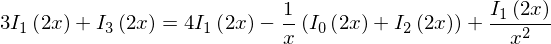

In [40]:
tmp  = dgl.subs(y(x),u).doit()
tmp

In [41]:
simplify(tmp.lhs - tmp.rhs)

## Bernoulli DGL

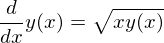

In [42]:
dgl = Eq(y(x).diff(x),sqrt(x*y(x)))
dgl

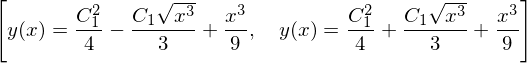

In [43]:
sol = dsolve(dgl)
sol

In [44]:
C1 = sol[0].atoms(Symbol).difference(dgl.atoms(Symbol)).pop()

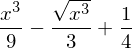

In [45]:
sol[0].rhs.subs(C1,1)

In [46]:
y1  = sol[0].rhs
y2  = sol[1].rhs

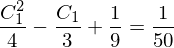

In [47]:
gl1 = Eq(y1.subs(x,1),Rational(1,50)) #Startwert
gl1

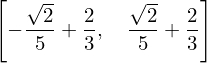

In [48]:
K1 = solve(gl1)
K1

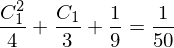

In [49]:
gl2 = Eq(y2.subs(x,1),Rational(1,50))
gl2

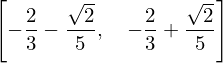

In [50]:
K2 = solve(gl2)
K2

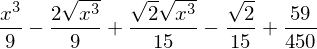

In [51]:
phi1 = y1.subs(C1,K1[0])
phi1.expand()

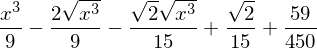

In [52]:
phi2 = y1.subs(C1,K1[1])
phi2.expand()

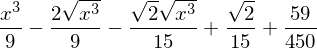

In [53]:
phi3 = y2.subs(C1,K2[0])
phi3.expand()

In [54]:
(phi2-phi3).simplify()

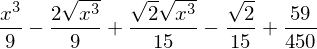

In [55]:
phi4 = y2.subs(C1,K2[1])
phi4.expand()

In [56]:
(phi1-phi4).simplify()

In [57]:
xn = np.linspace(0,2)
phi1n = lambdify(x,phi1)
phi2n = lambdify(x,phi2)

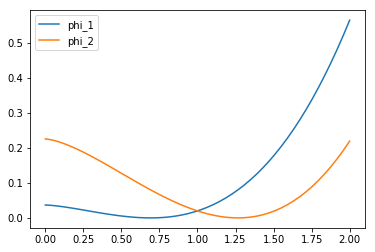

In [58]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xn,phi1n(xn),label='phi_1')
ax.plot(xn,phi2n(xn),label='phi_2')
ax.legend(loc='upper left')

In [59]:
vn = lambdify( (x,y(x)), dgl.rhs)

In [60]:
xg = np.linspace(0,2,21)
yg = np.linspace(0,0.5,21)
X,Y = np.meshgrid(xg,yg)
U = np.ones_like(X)
V = vn(X,Y).astype(float)

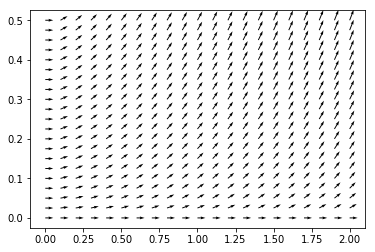

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.quiver(X,Y,U,V,angles='xy')

In [62]:
ax.plot(xn,phi1n(xn),label='phi_1')
ax.plot(xn,phi2n(xn),label='phi_2')
ax.legend(loc='upper left')

Welche ist die "richtige" ?